In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import final as fn
%matplotlib inline

In [2]:
pitstops_file = fn.read_data("data/pit_stops.csv")

In [3]:
results_file = fn.read_data("data/results.csv")

In [4]:
races_file = fn.read_data("data/races.csv")

In [5]:
ten_year_circuit = fn.past_ten_year_circuit(races_file)

In [6]:
clean_result = fn.delete_data(results_file, "position", "\\N")

In [7]:
num_result = fn.turn_column_num(clean_result, "position")

In [8]:
total_pitstop = fn.get_total_pitstop(pitstops_file)

In [9]:
result_pitstop = fn.join_table(total_pitstop, num_result,["raceId","driverId"])

In [10]:
result_pitstop = fn.join_table(result_pitstop, races_file, ["raceId"])
ten_year_circuit_df = result_pitstop[result_pitstop["circuitId"].isin(ten_year_circuit)]
stop_pos_cir = ten_year_circuit_df[["stop", "position", "circuitId"]]

<AxesSubplot:title={'center':'position'}, xlabel='[stop]'>

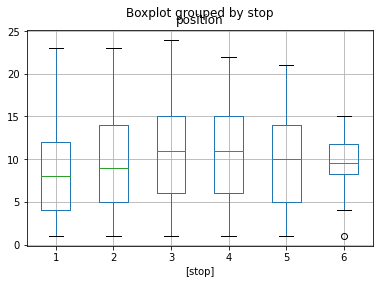

In [11]:
result_stop = result_pitstop[["stop", "position"]]
result_stop.boxplot(by="stop")

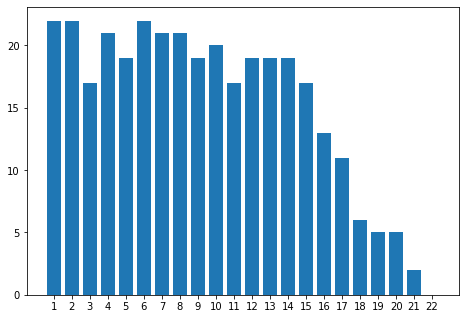

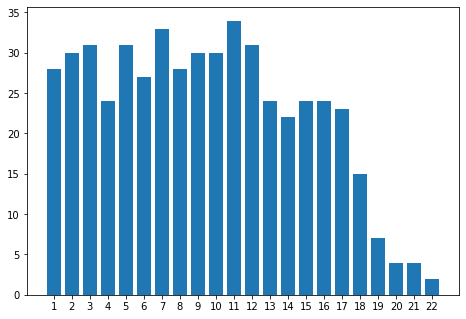

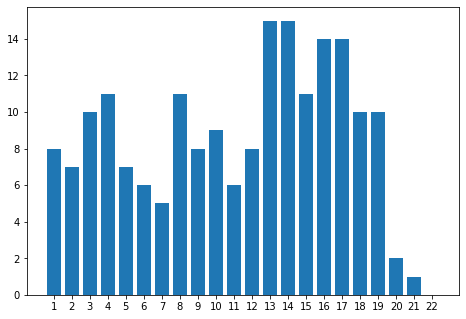

In [51]:
for n in range(1,4):
    count_list = []
    position_list = []
    for j in range(1,23):
        count_list.append(0)
        position_list.append(str(j))
    total_stop = stop_pos_cir.loc[stop_pos_cir["stop"] == n]
    for m in total_stop["position"]:
        count_list[m-1] += 1
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(position_list,count_list)
    plt.show()

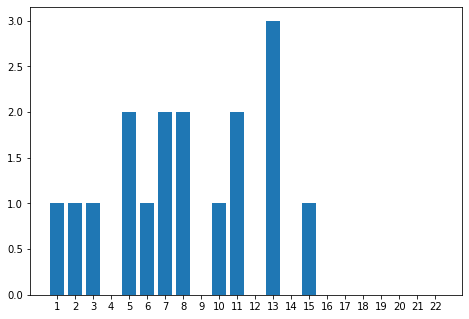

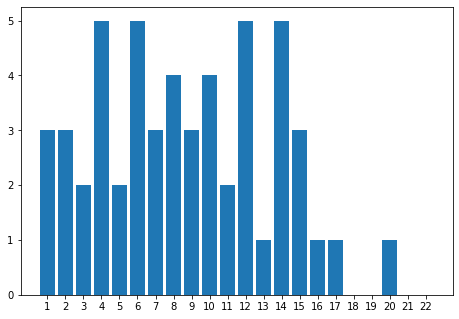

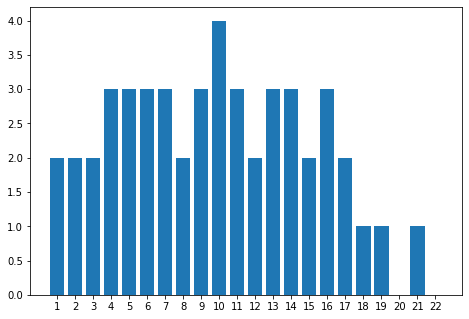

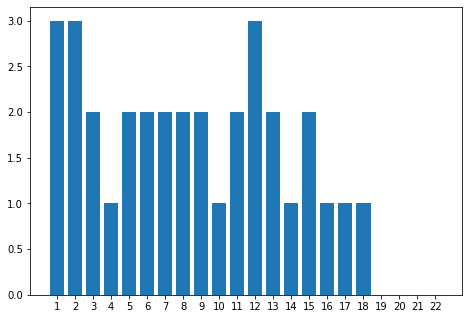

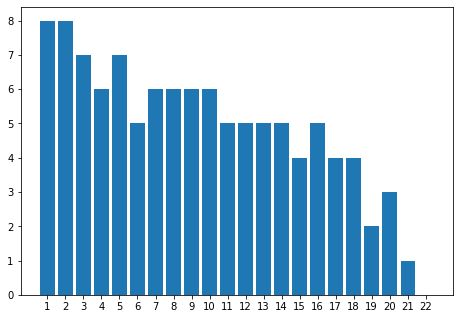

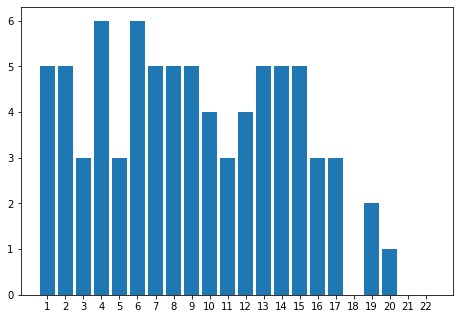

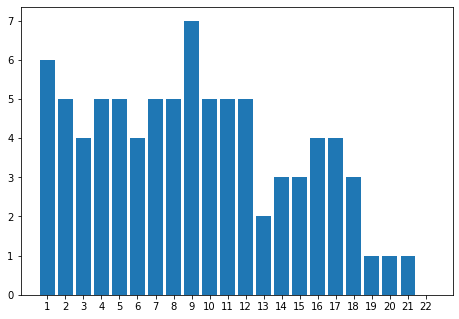

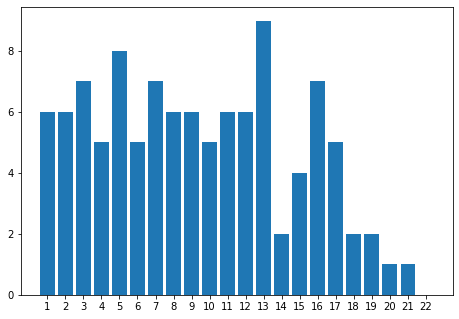

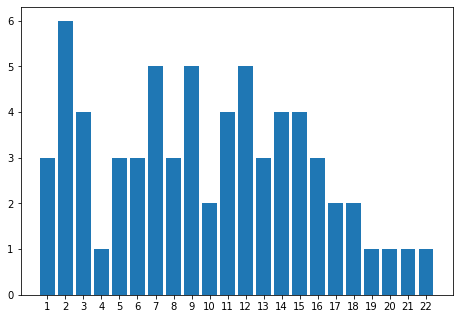

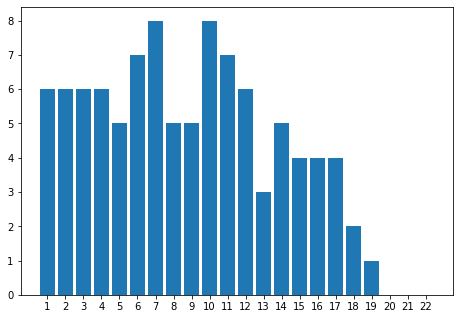

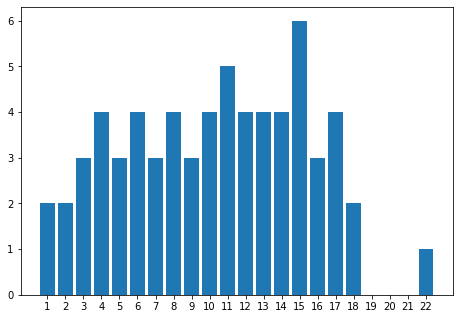

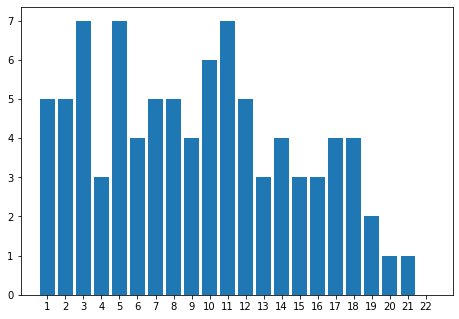

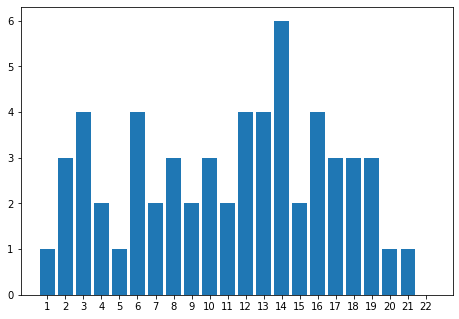

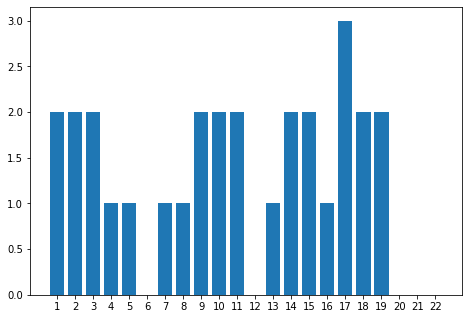

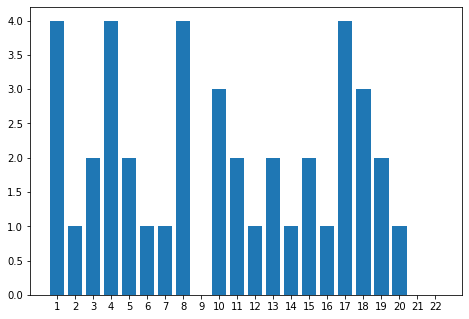

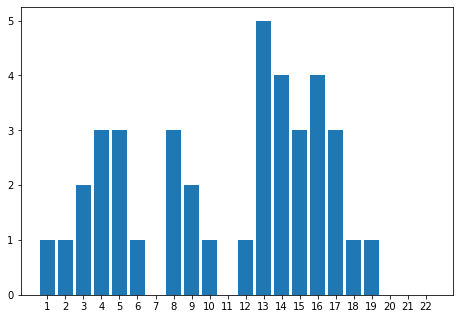

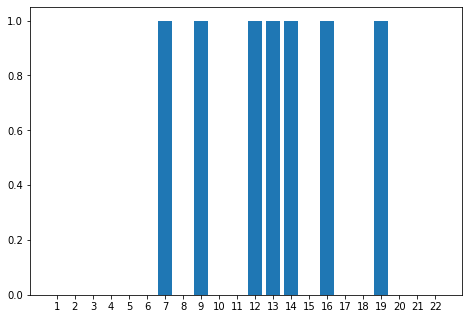

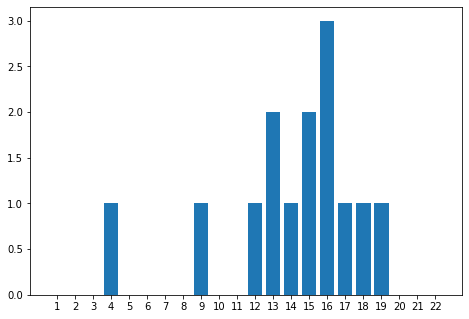

In [42]:
for n in range(1,4):
    for i in ten_year_circuit:
        count_list = []
        position_list = []
        for j in range(1,23):
            count_list.append(0)
            position_list.append(str(j))
        one_stop = stop_pos_cir.loc[(stop_pos_cir["stop"] == n) & (stop_pos_cir["circuitId"] == int(i))]
        for m in one_stop["position"]:
            count_list[m-1] += 1
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.bar(position_list,count_list)
        plt.show()